# 决策树 Decision Tree 模型

In [36]:
#导入库与读取数据

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [37]:
#读取数据
train = pd.read_csv("inputs/train.csv")
test = pd.read_csv("inputs/test.csv")
store = pd.read_csv("inputs/store.csv")

/Users/limao/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
#在EDA基础上，处理异常值

#train中去除open=1但是sales=0的数据
train = train.loc[train['Sales']>0]

#train 中StateHoliday 将字符与数字0混淆

train.StateHoliday = train.StateHoliday.map({'0':'0',0:'0','a':'a','b':'b','c':'c'})

#store中的NaN用0填充
store.fillna(0,inplace = True)

In [39]:
#store数据中缺少每家商店平均销量、平均客户数以及单客消费

train_comb = pd.merge(train,store,on ='Store',how = 'left')
train_comb['SalesPerCustomer'] = train['Sales']/train['Customers']
train_comb.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesPerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,8.626118


In [40]:
#计算每个store的平均数据

store_avg = train_comb.groupby('Store')[['Sales','Customers','SalesPerCustomer']].mean()
store_avg.columns = ['AvgSales','AvgCustomers','AvgSalesPerCustomer']
store_comb = pd.merge(store_avg.reset_index(),store,on='Store')

store_comb.head()

,Store,AvgSales,AvgCustomers,AvgSalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4759.096031,564.049936,9.675881,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,4953.900510,583.998724,9.524963,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6942.568678,750.077022,9.605451,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9638.401786,1321.752551,9.368412,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,4676.274711,537.340180,9.529327,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [65]:
#将store中的商店类型字符串变为int

#store_comb = pd.get_dummies(store_comb,columns=['StoreType','Assortment'])

#store_comb['StoreType'] = store_comb['StoreType'].astype('category').cat.codes
#store_comb['Assortment'] = store_comb['Assortment'].astype('category').cat.codes

#将store与train数据合并

feature_comb = pd.merge(train_comb,store_comb,on = 'Store',how ='left')
feature_comb = pd.get_dummies(feature_comb,columns=['StoreType','Assortment','StateHoliday'])

feature_comb.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance_x,CompetitionOpenSinceMonth_x,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,1270.0,9.0,...,0,1,0,1,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,570.0,11.0,...,0,0,0,1,0,0,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,14130.0,12.0,...,0,0,0,1,0,0,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,620.0,9.0,...,0,1,0,0,0,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,29910.0,4.0,...,0,0,0,1,0,0,1,0,0,0


In [66]:
list(feature_comb)

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance_x',
 'CompetitionOpenSinceMonth_x',
 'CompetitionOpenSinceYear_x',
 'Promo2_x',
 'Promo2SinceWeek_x',
 'Promo2SinceYear_x',
 'PromoInterval_x',
 'SalesPerCustomer',
 'AvgSales',
 'AvgCustomers',
 'AvgSalesPerCustomer',
 'CompetitionDistance_y',
 'CompetitionOpenSinceMonth_y',
 'CompetitionOpenSinceYear_y',
 'Promo2_y',
 'Promo2SinceWeek_y',
 'Promo2SinceYear_y',
 'PromoInterval_y',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c']

In [47]:
from sklearn.model_selection import train_test_split

#根据EDA的初步分析，选择重要的特征值

X = [
    'Store',
    'DayOfWeek',
    'Customers',
    'Promo',
    
    'StateHoliday_0',
    'StateHoliday_a',
    'StateHoliday_b',
    'StateHoliday_c',
    
    'StoreType_a',
    'StoreType_b',
    'StoreType_c',
    'StoreType_d',
    
    'Assortment_a',
    'Assortment_b',
    'Assortment_c',
    
    'AvgSales',
    'AvgCustomers',
    'AvgSalesPerCustomer',
    'CompetitionDistance_x',
    'CompetitionDistance_y'
    
]

X_train, X_test, y_train, y_test = train_test_split(feature_comb[X],feature_comb['Sales'],test_size = 0.15,random_state =30)

In [48]:
from sklearn.tree import DecisionTreeRegressor

#训练模型
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)



DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [49]:
#预测结果
y_pre = DT.predict(X_test)



In [50]:
#评价预测结果
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [51]:
# Error calculating function according to kaggle
def rmspe(y, y_pre):
    return np.sqrt(np.mean(((y - y_pre) / y) ** 2))

rmpse_scorer = make_scorer(rmspe, greater_is_better = False) # Loss function

def score(model, X_train, y_train, y_test, y_pre):
    score = cross_val_score(model, X_train, y_train, scoring=rmpse_scorer, cv=5)
    print('Mean', score.mean())
    print('Variance', score.var())
    print('RMSPE', rmspe(y_test, y_pre))

def plot_importance(model):
    k = list(zip(X, model.feature_importances_))
    k.sort(key=lambda tup: tup[1])

    labels, vals = zip(*k)
    
    plt.barh(np.arange(len(X)), vals, align='center')
    plt.yticks(np.arange(len(X)), labels)

In [52]:
score(DT, X_train, y_train, y_test, y_pre)


Mean -0.092294515193194
Variance 6.723435195870285e-07
RMSPE 0.09017667076951927


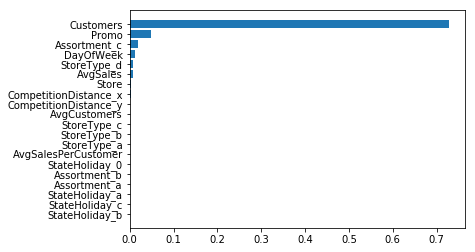

In [53]:
plot_importance(DT)


## 尝试使用AdaBoost提升结果


In [54]:
from sklearn.ensemble import AdaBoostRegressor
Ada_DT = AdaBoostRegressor(DecisionTreeRegressor())

Ada_DT.fit(X_train,y_train)
y_pre = Ada_DT.predict(X_test)

score(Ada_DT,X_train,y_train,y_test,y_pre)

Mean -0.07874855556765978
Variance 9.898291142057949e-06
RMSPE 0.0758196931634427


In [55]:
store_comb.head()

,Store,AvgSales,AvgCustomers,AvgSalesPerCustomer,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,4759.096031,564.049936,9.675881,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0,1,0,1,0,0
1,2,4953.900510,583.998724,9.524963,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",1,0,0,0,1,0,0
2,3,6942.568678,750.077022,9.605451,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1,0,0,0,1,0,0
3,4,9638.401786,1321.752551,9.368412,620.0,9.0,2009.0,0,0.0,0.0,0,0,0,1,0,0,0,1
4,5,4676.274711,537.340180,9.529327,29910.0,4.0,2015.0,0,0.0,0.0,0,1,0,0,0,1,0,0


In [62]:
# 使用test数据集,首先提取特征

test_feature = pd.merge(test,store_comb,on = 'Store',how ='left')
test_feature = pd.get_dummies(test_feature,columns=['StateHoliday'])

test_feature.head()


,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,AvgSales,AvgCustomers,AvgSalesPerCustomer,...,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a
0,1,1,4,2015-09-17,1.0,1,0,4759.096031,564.049936,9.675881,...,0,0,0,1,0,1,0,0,1,0
1,2,3,4,2015-09-17,1.0,1,0,6942.568678,750.077022,9.605451,...,"Jan,Apr,Jul,Oct",1,0,0,0,1,0,0,1,0
2,3,7,4,2015-09-17,1.0,1,0,8817.050891,948.561069,9.546486,...,0,1,0,0,0,0,0,1,1,0
3,4,8,4,2015-09-17,1.0,1,0,5539.358418,658.197704,9.447524,...,0,1,0,0,0,1,0,0,1,0
4,5,9,4,2015-09-17,1.0,1,0,6562.337612,579.816431,9.686275,...,0,1,0,0,0,0,0,1,1,0


In [63]:
list(test_feature)

['Id',
 'Store',
 'DayOfWeek',
 'Date',
 'Open',
 'Promo',
 'SchoolHoliday',
 'AvgSales',
 'AvgCustomers',
 'AvgSalesPerCustomer',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c',
 'StateHoliday_0',
 'StateHoliday_a']

In [60]:
#从test数据可以看到，不含Customers、'StateHoliday_b' 'StateHoliday_c' 'CompetitionDistance_x'\n 'CompetitionDistance_y'
X_test = [
    'Store',
    'DayOfWeek',
    'Promo',
    
    'StateHoliday_0',
    'StateHoliday_a',
    
    'StoreType_a',
    'StoreType_b',
    'StoreType_c',
    'StoreType_d',
    
    'Assortment_a',
    'Assortment_b',
    'Assortment_c',
    
    'AvgSales',
    'AvgCustomers',
    'AvgSalesPerCustomer',
    'CompetitionDistance'
    
]


In [61]:
#输出结果

y_test_pre = Ada_DT.predict(test_feature[X_test])

df = pd.DataFrame({"Id":range(1,len(test) + 1),'Sales':y_test_pre})
df.loc[test['Open']==0,'Sales'] =1 
df.to_csv('submission_Ada.csv',indexv = False)

ValueError: Number of features of the model must match the input. Model n_features is 27 and input n_features is 16 